In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets

from collections import deque
import math
import heapq

import time
import random
import bisect

# Exercício sobre Algoritmos genéticos

## Construindo um algoritmo genético

Queremos analisar o algoritmo genético, mas em um contexto diferente dos vistos anteriormente.

Imagine que você conseguiu achar uma brecha em um sistema de login, cujas senhas tem sempre 17 caracteres maiúsculos ou minúsculos, incluindo o espaço. A brecha encontrada diz quantos dos caracteres da senha colocada estão na posição correta, mas não diz quais que estão corretos.

Ou seja, se a senha de uma pessoa é abcdefghijklmnopq e você inseriu abc**z**efghi**a**klmnopq, o sistema lhe diz que você acertou 15.

Apesar de ser uma falha muito grave, você deve acertar uma senha dentre 53¹⁷=205442259656281392806087233013.

Com isso, queremos construir um algoritmo genético que consiga podar este espaço de busca imenso e acertar uma senha, que por acaso é **Genetic Algorithm**.

In [0]:
target = 'Genetic Algorithm'

Agora vamos definir os genes do algoritmo genético, que são todos os caracteres aceitos:

In [0]:
# The ASCII values of uppercase characters ranges from 65 to 91
u_case = [chr(x) for x in range(65, 91)]
# The ASCII values of lowercase characters ranges from 97 to 123
l_case = [chr(x) for x in range(97, 123)]

gene_pool = []
gene_pool.extend(u_case) # adds the uppercase list to the gene pool
gene_pool.extend(l_case) # adds the lowercase list to the gene pool
gene_pool.append(' ')    # adds the space character to the gene pool

Agora vamos inicializar o tamanho da população, a taxa de mutação:

In [0]:
max_population = 100
mutation_rate = 0.07

E criar nossa função de fitness:

In [0]:
def fitness_fn(sample):
    # initialize fitness to 0
    fitness = 0
    for i in range(len(sample)):
        # increment fitness by 1 for every matching character
        if sample[i] == target[i]:
            fitness += 1
    return fitness

E inicializar nossa população:

In [0]:
def init_population(pop_number, gene_pool, state_length):
    """Initializes population for genetic algorithm
    pop_number  :  Number of individuals in population
    gene_pool   :  List of possible values for individuals
    state_length:  The length of each individual"""
    g = len(gene_pool)
    population = []
    for i in range(pop_number):
        new_individual = [gene_pool[random.randrange(0, g)] for j in range(state_length)]
        population.append(new_individual)

    return population

population = init_population(max_population, gene_pool, len(target))

Agora vamos selecionar dois dos indivíduos mais propícios para cruzar:

In [0]:
def weighted_sampler(seq, weights):
    """Return a random-sample function that picks from seq weighted by weights."""
    totals = []
    for w in weights:
        totals.append(w + totals[-1] if totals else w)

    return lambda: seq[bisect.bisect(totals, random.uniform(0, totals[-1]))]

def select(r, population, fitness_fn):
    fitnesses = map(fitness_fn, population)
    sampler = weighted_sampler(population, fitnesses)
    return [sampler() for i in range(r)]

parents = select(2, population, fitness_fn) 

E vamos recombinar os indivíduos selecionados para gerar seus filhos, os quais poderão sofrer mutação:

In [0]:
def recombine(x, y):
    n = len(x)
    c = random.randrange(0, n)
    return x[:c] + y[c:]

def mutate(x, gene_pool, pmut):
    if random.uniform(0, 1) >= pmut:
        return x

    n = len(x)
    g = len(gene_pool)
    c = random.randrange(0, n)
    r = random.randrange(0, g)

    new_gene = gene_pool[r]
    return x[:c] + [new_gene] + x[c+1:]

child = recombine(*parents)
child = mutate(child, gene_pool, mutation_rate)

Agora precisamos fazer este processo para toda a população e gerar uma população descendente:

In [0]:
population = [mutate(recombine(*select(2, population, fitness_fn)), gene_pool, mutation_rate) for i in range(len(population))]

Para o algoritmo não ficar rodando eternamente, vamos definir o número de gerações e um limiar do fitness para indicar que o algoritmo chegou a solução:

In [0]:
ngen = 1200 # maximum number of generations
# we set the threshold fitness equal to the length of the target phrase
# i.e the algorithm only terminates whne it has got all the characters correct 
# or it has completed 'ngen' number of generations
f_thres = len(target)

argmax = max
argmin = min

def fitness_threshold(fitness_fn, f_thres, population):
    if not f_thres:
        return None

    fittest_individual = argmax(population, key=fitness_fn)
    if fitness_fn(fittest_individual) >= f_thres:
        return fittest_individual

    return None

E por último criar o algoritmo genético com todos os passos acima integrados:

In [0]:
def genetic_algorithm_stepwise(population, fitness_fn, gene_pool=[0, 1], f_thres=None, ngen=1200, pmut=0.1):
    all_generations_fitness = []
    
    for generation in range(ngen):
        population = [mutate(recombine(*select(2, population, fitness_fn)), gene_pool, pmut) for i in range(len(population))]
        # stores the individual genome with the highest fitness in the current population
        current_best = ''.join(max(population, key=fitness_fn))
        print(f'Current best: {current_best}\t\tGeneration: {str(generation)}\t\tFitness: {fitness_fn(current_best)}\r', end='')
        
        #Store fitness from all generations
        all_generations_fitness.append(fitness_fn(current_best)) #Change here
        
        
        # compare the fitness of the current best individual to f_thres
        fittest_individual = fitness_threshold(fitness_fn, f_thres, population)
        
        # if fitness is greater than or equal to f_thres, we terminate the algorithm
        if fittest_individual:
            return fittest_individual, generation, all_generations_fitness #Change here
    return max(population, key=fitness_fn) , generation, all_generations_fitness #Change here

In [35]:
population = init_population(max_population, gene_pool, len(target))
solution, generations, all_generation_fitness = genetic_algorithm_stepwise(population, fitness_fn, gene_pool, f_thres, ngen, mutation_rate)

Vemos que em 974 gerações o algoritmo genético conseguiu chegar na solução exata.

In [19]:
print("Melhor solução: {}		Generation: {}		Fitness: {}".format("".join(solution), generations, fitness_fn(solution)))

Melhor solução: Genetic Algorithm		Generation: 998		Fitness: 17


## Agora é sua vez

Modifique o código do algoritmo genético para guardar em cada geração o fitness da mesma.

Após isso, varie a população entre 50 e 100 indivíduos e para cada população, varie a taxa de mutação em 0.07, 0.14, 0.21.

Por último, plote 6 gráficos de linhas - uma para cada combinação de tamanho da população e taxa de mutação - mostrando a evolução do fitness ao longo das gerações. E responda: **Aumentar a taxa de mutação faz o algoritmo genético ser mais eficiente? E aumentar o tamanho da população?**


In [0]:
## Faça aqui seu código

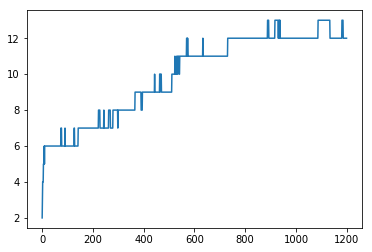

In [73]:
max_population = 50 
mutation_rate = .07


population = init_population(max_population, gene_pool, len(target))
solution, generations, all_generation_fitness = genetic_algorithm_stepwise(population, fitness_fn, gene_pool, f_thres, ngen, mutation_rate)
plt.plot(all_generation_fitness)

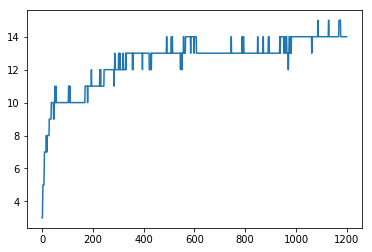

In [75]:
max_population = 50 
mutation_rate = .14


population = init_population(max_population, gene_pool, len(target))
solution, generations, all_generation_fitness = genetic_algorithm_stepwise(population, fitness_fn, gene_pool, f_thres, ngen, mutation_rate)
plt.plot(all_generation_fitness)

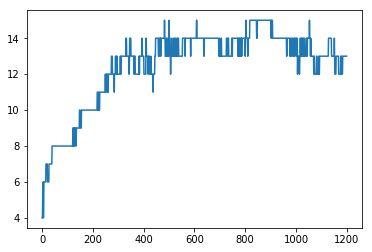

In [76]:
max_population = 50 
mutation_rate = .21


population = init_population(max_population, gene_pool, len(target))
solution, generations, all_generation_fitness = genetic_algorithm_stepwise(population, fitness_fn, gene_pool, f_thres, ngen, mutation_rate)
plt.plot(all_generation_fitness)

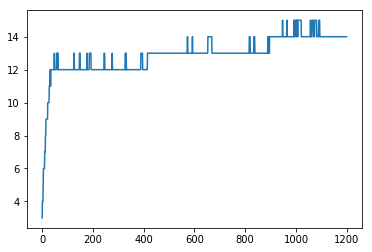

In [77]:
max_population = 100 
mutation_rate = .07


population = init_population(max_population, gene_pool, len(target))
solution, generations, all_generation_fitness = genetic_algorithm_stepwise(population, fitness_fn, gene_pool, f_thres, ngen, mutation_rate)
plt.plot(all_generation_fitness)

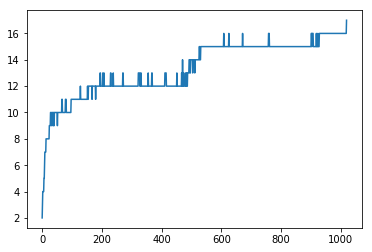

In [78]:
max_population = 100 
mutation_rate = .14


population = init_population(max_population, gene_pool, len(target))
solution, generations, all_generation_fitness = genetic_algorithm_stepwise(population, fitness_fn, gene_pool, f_thres, ngen, mutation_rate)
plt.plot(all_generation_fitness)

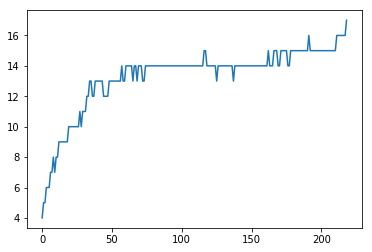

In [79]:
max_population = 100
mutation_rate = .21


population = init_population(max_population, gene_pool, len(target))
solution, generations, all_generation_fitness = genetic_algorithm_stepwise(population, fitness_fn, gene_pool, f_thres, ngen, mutation_rate)
plt.plot(all_generation_fitness)

##Conclusão
É possivel obversar que quanto maior a população e quanto maior a taxa de mutação, tende-se a chegar mais próximo do resultado esperado (ou seja, o algoritmo genético fica mais eficiente). Porém, pelos testes feitos anteriormente, o tamanho da população tende a ser mais relevante para a otimização do resultado do que a taxa de mutação, conseguindo, por vezes chegar no valor esperado (testes com 14% e 21% de mutação, sendo que a com maior mutação, o algoritmo chegou no resultado mais rapidamente) o que não acontece com a população menor.